In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
classifier = Sequential()

classifier.add(Conv2D(24, (3, 3), input_shape = (94, 94, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(24, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(24, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [3]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Govt Project/Malaria Data/Malaria Train',
                                                 target_size = (94,94 ),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2400 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Govt Project/Malaria Data/Malaria Test',
                                            target_size = (94, 94),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 600 images belonging to 2 classes.


In [7]:
classifier.fit_generator(training_set,
                         epochs =20 ,
                         validation_data = test_set,
                         validation_steps = 1000)

Epoch 1/20
75/75 [==============================] - 62s 831ms/step - loss: 0.1170 - accuracy: 0.9575 - val_loss: 0.2494 - val_accuracy: 0.8302
Epoch 2/20
75/75 [==============================] - 62s 833ms/step - loss: 0.0227 - accuracy: 0.9962 - val_loss: 1.0333 - val_accuracy: 0.8831
Epoch 3/20
75/75 [==============================] - 62s 830ms/step - loss: 0.0187 - accuracy: 0.9971 - val_loss: 0.7946 - val_accuracy: 0.8832
Epoch 4/20
75/75 [==============================] - 63s 835ms/step - loss: 0.0195 - accuracy: 0.9971 - val_loss: 0.3843 - val_accuracy: 0.8833
Epoch 5/20
75/75 [==============================] - 62s 823ms/step - loss: 0.0197 - accuracy: 0.9971 - val_loss: 0.7422 - val_accuracy: 0.8832
Epoch 6/20
75/75 [==============================] - 62s 829ms/step - loss: 0.0179 - accuracy: 0.9971 - val_loss: 0.5478 - val_accuracy: 0.8835
Epoch 7/20
75/75 [==============================] - 62s 829ms/step - loss: 0.0191 - accuracy: 0.9971 - val_loss: 0.1835 - val_accuracy: 0.8833

In [8]:
import numpy as np
from keras.preprocessing import image

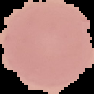

In [10]:
test_image=image.load_img('C:/Users/gaurav sahani/Desktop/Govt Project/Malaria Data/Malaria Test/Uninfected/1.png', target_size = (94, 94))
test_image

In [11]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis = 0)

In [12]:
result = classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [16]:
classifier.save('GovMalaria.h5')